In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from plot_functions import *
from sklearn.model_selection import KFold

In [2]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os


def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
n_splits = 10
import sys
case=2
a=2
cost='abs'

In [43]:
def get_tensor_appliance(df, dfc, appliance):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] ]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 1, stop - start))
    M, N, O = tensor.shape
    return tensor

In [44]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER[2:]]).flatten()
    print(energy_cols)
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 5, stop - start))
    M, N, O = tensor.shape
    return tensor

In [45]:
df, dfc = create_matrix_single_region("SanDiego", year)


In [72]:
agg_tensor = get_tensor_appliance(df, dfc, "aggregate")
H, A_agg, T = learn_HAT_adagrad(case, agg_tensor, 2, 3, num_iter=6000, lr=1, dis=True, cost_function=cost)


465.952679409
71.8016071281
71.7993388216
71.7542559475
57.2629672699
49.4732958267
49.4018067031
49.390080358
49.3854386976
49.3829054435
49.3814936927
49.3807059595


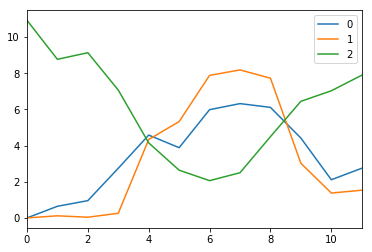

In [73]:
pd.DataFrame(T).plot()

In [74]:
A_appliances = {}
for appliance in APPLIANCES_ORDER[1:]:
    tensor = get_tensor_appliance(df, dfc, appliance)
    H, A_appliances[appliance], T = learn_HAT_adagrad(case, tensor, 2, 3, num_iter=4000, lr=1, dis=True,
                                              cost_function=cost, H_known=H, T_known=T)
    print appliance




94.3658980717
64.6513307095
64.6513304145
64.6513304144
64.6513304144
64.6513304144
64.6513304144
64.6513304144
hvac
94.8485843699
18.2355662692
18.2355340899
18.2355340603
18.2355340603
18.2355340603
18.2355340603
18.2355340603
fridge
131.356549358
5.16032878481
5.1603222748
5.16032227283
5.16032227283
5.16032227283
5.16032227283
5.16032227283
mw
127.80581512
5.73072976574
5.73069570114
5.73069547485
5.73069547335
5.73069547334
5.73069547334
5.73069547334
dw
107.251246374
2.26544519309
1.9797440998
1.90346158172
1.8453586506
1.84444581225
1.84444581225
1.84444581225
wm
147.59297253
6.54532462219
6.54532462219
6.54532462219
6.54532462219
6.54532462219
6.54532462219
6.54532462219
oven


In [75]:
A_appliances['hvac']

array([[[ 0.        ,  4.51277784,  0.        ],
        [ 0.6846507 ,  2.2341801 ,  0.        ]]])

In [18]:
A_appliances['fridge']

array([[[ 1.74530586,  0.6928115 ,  1.34212043],
        [ 1.32771902,  0.97556628,  0.44660423]]])

In [42]:
A_appliances

{'dw': array([[[ 0.08814621,  0.08217839,  0.17652345],
         [ 0.20414361,  0.08616791,  0.15768073]]]),
 'fridge': array([[[ 1.78850579,  0.37616935,  0.83541954],
         [ 0.96210398,  0.68809694,  0.36808008]]]),
 'hvac': array([[[ 0.        ,  4.17971663,  0.        ],
         [ 0.        ,  8.48636573,  0.        ]]]),
 'mw': array([[[ 0.37697709,  0.        ,  0.07192787],
         [ 0.25697845,  0.14849491,  0.02903612]]]),
 'oven': array([[[ 0.29247995,  0.02354258,  0.17371002],
         [ 0.24458275,  0.07189741,  0.30554979]]]),
 'wm': array([[[ 0.12634565,  0.        ,  0.07773993],
         [ 0.06194318,  0.17751138,  0.0396261 ]]])}

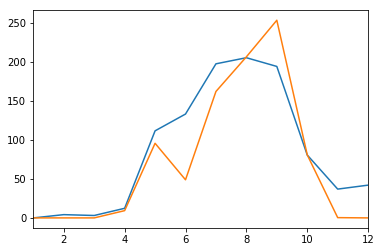

In [77]:
appliance='hvac'
pred_df = pd.DataFrame(multiply_case(H, A_appliances[appliance], T, 2)[:, 0, :]).mean()
pred_df.index = range(1, 13)
pred_df.plot()
gt_df = df[["{}_{}".format(appliance, month) for month in range(1, 13)]].mean()
gt_df.index = range(1, 13)
gt_df.plot()

In [12]:
from sklearn.model_selection import train_test_split, KFold

In [13]:
n_splits = 10


In [14]:
from common import compute_rmse

In [27]:
np.arange(0.1, 1.0, 0.1)

array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [16]:
H_au, A_au, T_au = learn_HAT(case, au_tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)
H, A, T = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost, A_known=A_au)
H_n, A_n, T_n = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

H_se, A_se, T_se ={}, {}, {}
for constant in [0.1, 1, 10]:
    h, A_c, t = learn_HAT(case, au_tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost, T_known=constant*np.ones(12).reshape(-1, 1))

    H_se[constant], A_se[constant], T_se[constant] = learn_HAT(case, tensor, 2, 3, num_iter=2000, lr=0.1, dis=False, cost_function=cost,
                    A_known=A_c, T_known=constant*np.ones(12).reshape(-1, 1))

In [26]:
A_au.shape

(5, 2, 3)

In [17]:
HAT = multiply_case(H, A, T, case)
HAT_n = multiply_case(H_n, A_n, T_n, case)

HAT_se = {}
for constant in [0.1, 1, 10]:
    HAT_se[constant] = multiply_case(H_se[constant], A_se[constant], T_se[constant], case)

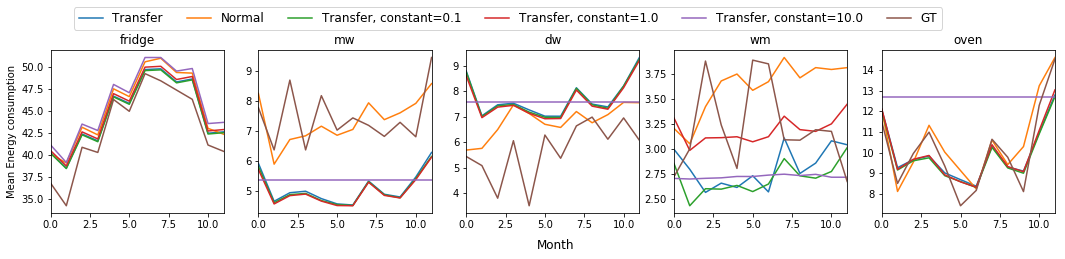

In [29]:
fig, ax = plt.subplots(ncols=s, figsize=(18, 3), sharex=True)
for i, appliance in enumerate(APPLIANCES_ORDER[2:]):
    pred_appliance= pd.DataFrame(HAT[:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
    pred_appliance.plot(ax=ax[i], label='Transfer')
    pred_normal = pd.DataFrame(HAT_n[:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
    pred_normal.plot(ax=ax[i], label='Normal')
    for constant in [0.1, 1, 10]:
        pred_appliance_season= pd.DataFrame(HAT_se[constant][:, APPLIANCES_ORDER[2:].index(appliance), :], index=df.index).mean()
        pred_appliance_season.plot(ax=ax[i], label='Transfer, constant=%0.1f' %constant)
    gt_appliance = df[['%s_%d' %(appliance, month) for month in range(1, 13)]].mean()
    gt_appliance.index =pred_appliance.index
    gt_appliance.plot(ax=ax[i], label='GT')
    ax[i].set_title(appliance)
ax[0].legend( bbox_to_anchor=(0.1,1.3), loc="upper left", ncol=6, fontsize=12)
ax[0].set_ylabel("Mean Energy consumption")
fig.text(0.5, -0.04, "Month", fontsize=12)